# An Introduction to Graph Theory and Network Analysis (with Python codes)
https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/

------------------------
graphviz is installed already, but need lib too
* !apt install libgraphviz-dev
* !pip install pygraphviz

------------------------
Or 
* step 0 - avoid conda install graphviz - it installs it as regular graphviz program outside of conda installer - that is why it does not * * work - if you already installed it use: 

* (optional) conda uninstall graphviz
* conda install python-graphviz 
* conda install -c conda-forge pygraphviz (this is wraper for the program above)
* install other necessary packages 
------------------------------------------

Consider that a graph represents the places in a city that people generally visit, and the path that was followed by a visitor of that city. Let us consider V as the places and E as the path to travel from one place to another.

* V = {v1, v2, v3, v4, v5} 

* E = {(v1,v2), (v2,v5), (v5, v5), (v4,v5), (v4,v4)}

The edge (u,v) is the same as the edge (v,u) – They are unordered pairs.

Formally,

* A Graph is a pair of sets. G = (V,E). V is the set of vertices. E is a set of edges. E is made up of pairs of elements from V (unordered pair)
* A DiGraph is also a pair of sets. D = (V,A). V is the set of vertices. A is the set of arcs. A is made up of pairs of elements from V (ordered pair)

In the case of digraphs, there is a distinction between `(u,v)` and `(v,u)`. Usually the edges are called arcs in such cases to indicate a 
notion of direction

#### Why graphs
* Graphs provide a better way of dealing with abstract concepts like relationships and interactions. They also offer an intuitively visual way of thinking about these concepts. Graphs also form a natural basis for analyzing relationships in a Social context
* Graph Databases have become common computational tools and alternatives to SQL and NoSQL databases
* Graphs are used to model analytics workflows in the form of DAGs (Directed acyclic graphs)
* Some Neural Network Frameworks also use DAGs to model the various operations in different layers
* Graph Theory concepts are used to study and model Social Networks, Fraud patterns, Power consumption patterns, Virality and Influence in Social Media. Social Network Analysis (SNA) is probably the best known application of Graph Theory for Data Science
* It is used in Clustering algorithms – Specifically K-Means
* System Dynamics also uses some Graph Theory concepts – Specifically loops
* Path Optimization is a subset of the Optimization problem that also uses Graph concepts
* From a Computer Science perspective – Graphs offer computational efficiency. The Big O complexity for some algorithms is better for data arranged in the form of Graphs (compared to tabular data)

#### Terminology you should know.

* The vertices u and v are called the end vertices of the edge (u,v)
* If two edges have the same end vertices they are Parallel
* An edge of the form (v,v) is a loop
* A Graph is simple if it has no parallel edges and loops
* A Graph is said to be Empty if it has no edges. Meaning E is empty
* A Graph is a Null Graph if it has no vertices. Meaning V and E is empty
* A Graph with only 1 Vertex is a Trivial graph
* Edges are Adjacent if they have a common vertex. Vertices are Adjacent if they have a common edge
* The degree of the vertex v, written as d(v), is the number of edges with v as an end vertex. By convention, we count a loop twice and parallel edges contribute separately
* Isolated Vertices are vertices with degree 1. d(1) vertices are isolated
* A Graph is Complete if its edge set contains every possible edge between ALL of the vertices
* A Walk in a Graph G = (V,E) is a finite, alternating sequence of the form  ViEiViEi  consisting of vertices and edges of the graph G
* A Walk is Open if the initial and final vertices are different. A Walk is Closed if the initial and final vertices are the same
* A Walk is a Trail if ANY edge is traversed atmost once
* A Trail is a Path if ANY vertex is traversed atmost once (Except for a closed walk)
* A Closed Path is a Circuit – Analogous to electrical circuits

#### Graph Theory concepts

##### 1. **Average Path Length**
The average of the shortest path lengths for all possible node pairs. Gives a measure of ‘tightness’ of the Graph and can be used to understand how quickly/easily something flows in this Network.

##### 2. **BFS and DFS**
Breadth first search and Depth first search are two different algorithms used to search for Nodes in a Graph. They are typically used to figure out if we can reach a Node from a given Node. This is also known as Graph Traversal

The aim of the BFS is to traverse the Graph as close as possible to the root Node, while the DFS algorithm aims to move as far as possible away from the root node.

##### 3. **Centrality**
Centrality aims to find the most important nodes in a network. There may be different notions of “important” and hence there are many centrality measures. There are measures that are characterized by flow along the edges and those that are characterized by Walk Structure.

1. Degree Centrality – The first and conceptually the simplest Centrality definition. This is the number of edges connected to a node. In the case of a directed graph, we can have 2 degree centrality measures. Inflow and Outflow Centrality
2. Closeness Centrality – Of a node is the average length of the shortest path from the node to all other nodes
3. Betweenness Centrality – Number of times a node is present in the shortest path between 2 other nodes

These centrality measures have variants and the definitions can be implemented using various algorithms. All in all, this means a large number of definitions and algorithms.

##### 4. **Network Density**
A measure of how many edges a Graph has. The actual definition will vary depending on type of Graph and the context in which the question is asked. For a complete undirected Graph the Density is 1, while it is 0 for an empty Graph. Graph Density can be greater than 1 in some situations (involving loops).

##### 5. **Graph Randomizations**
While the definitions of some Graph metrics maybe easy to calculate, it is not easy to understand their relative importance. We use Network/Graph Randomizations in such cases. We calculate the metric for the Graph at hand and for another similar Graph that is randomly generated. This similarity can for example be the same number of density and nodes. Typically we generate a 1000 similar random graphs and calculate the Graph metric for each of them and then compare it with the same metric for the Graph at hand to arrive at some notion of a benchmark.

In Data Science when trying to make a claim about a Graph it helps if it is contrasted with some randomly generated Graphs.

In [1]:
import networkx as nx

# Creating a Graph 
G = nx.Graph() # Right now G is empty

# Add a node
G.add_node(1) 
G.add_nodes_from([2,3]) # You can also add a list of nodes by passing a list argument

# Add edges 
G.add_edge(1,2)

e = (2,3)
G.add_edge(*e) # * unpacks the tuple
G.add_edges_from([(1,2), (1,3)]) # Just like nodes we can add edges from a list

Node and Edge attributes can be added along with the creation of Nodes and Edges by passing a tuple containing node and attribute dict.

In addition to constructing graphs node-by-node or edge-by-edge, they can also be generated by applying classic graph operations, such as:

* subgraph(G, nbunch)      - induced subgraph view of G on nodes in nbunch
* union(G1,G2)             - graph union
* disjoint_union(G1,G2)    - graph union assuming all nodes are different
* cartesian_product(G1,G2) - return Cartesian product graph
* compose(G1,G2)           - combine graphs identifying nodes common to both
* complement(G)            - graph complement
* create_empty_copy(G)     - return an empty copy of the same graph class
* convert_to_undirected(G) - return an undirected representation of G
* convert_to_directed(G)   - return a directed representation of G

Separate classes exist for different types of Graphs. For example the **nx.DiGraph()** class allows you to create a Directed Graph. Specific graphs containing paths can be created directly using a single method. For a full list of Graph creation methods please refer to the full documentation.

#### Accessing edges and nodes
Nodes and Edges can be accessed together using the **G.nodes()** and **G.edges()** methods. Individual nodes and edges can be accessed using the bracket/subscript notation.

In [2]:
G.nodes()

NodeView((1, 2, 3))

In [3]:
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3)])

In [4]:
G[1] # same as G.adj[1]

AtlasView({2: {}, 3: {}})

In [5]:
G[1][2]

{}

### Graph Visualization
Networkx provides basic functionality for visualizing graphs, but its main goal is to enable graph analysis rather than perform graph visualization.

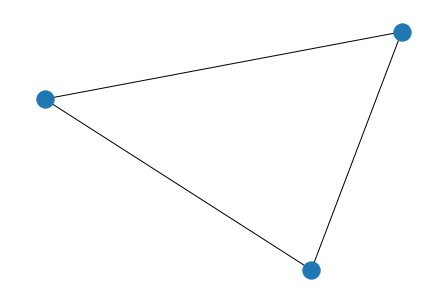

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G)

In [1]:
import pygraphviz as pgv
d={'1': {'2': None}, '2': {'1': None, '3': None}, '3': {'1': None}}
A = pgv.AGraph(data=d)
print(A) # This is the 'string' or simple representation of the Graph

strict graph "" {
	1 -- 2;
	2 -- 3;
	3 -- 1;
}



In [2]:
# Let us create another Graph where we can individually control the colour of each node
B = pgv.AGraph()

# Setting node attributes that are common for all nodes 
B.node_attr['style']='filled'
B.node_attr['shape']='circle'
B.node_attr['fixedsize']='true'
B.node_attr['fontcolor']='#FFFFFF'

# Creating and setting node attributes that vary for each node (using a for loop)
for i in range(16):
 B.add_edge(0,i)
 n=B.get_node(i)
 n.attr['fillcolor']="#%2x0000"%(i*16)
 n.attr['height']="%s"%(i/16.0+0.5)
 n.attr['width']="%s"%(i/16.0+0.5)
B.draw('star.png',prog="circo") # This creates a .png file in the local directory. Displayed below.

Image('images/star.png', width=650) # The Graph visualization we created above.

NameError: name 'Image' is not defined

Usually, visualization is thought of as a separate task from Graph analysis. A graph once analyzed is exported as a Dotfile. This Dotfile is then visualized separately to illustrate a specific point we are trying to make.

### Analysis on a Dataset

We will be looking to take a generic dataset (not one that is specifically intended to be used for Graphs) and do some manipulation (in pandas) so that it can be ingested into a Graph in the form of a edgelist. And edgelist is a list of tuples that contain the vertices defining every edge

The dataset we will be looking at comes from the Airlines Industry. It has some basic information on the Airline routes. There is a Source of a journey and a destination. There are also a few columns indicating arrival and departure times for each journey. As you can imagine this dataset lends itself beautifully to be analysed as a Graph. Imagine a few cities (nodes) connected by airline routes (edges). If you are an airline carrier, you can then proceed to ask a few questions like

* What is the shortest way to get from A to B? In terms of distance and in terms of time
* Is there a way to go from C to D?
* Which airports have the heaviest traffic?
* Which airport in “in between” most other airports? So that it can be converted into a local hub

In [1]:
import pandas as pd 
import numpy as np

data = pd.read_csv('https://bitbucket.org/dipolemoment/analyticsvidhya/raw/4ff55e7b4b7bd5d7f6d1aebd9e6fcc954d2106ec/Airlines.csv/')
print(data.shape)
data.dtypes

(100, 16)


year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
dtype: object

1. We notice that origin and destination look like good choices for Nodes. Everything can then be imagined as either node or edge attributes. A single edge can be thought of as a journey. And such a journey will have various times, a flight number, an airplane tail number etc associated with it
2. We notice that the year, month, day and time information is spread over many columns. We want to create one datetime column containing all of this information. We also need to keep scheduled and actual time of arrival and departure separate. So we should finally have 4 datetime columns (Scheduled and actual times of arrival and departure)
3. Additionally, the time columns are not in a proper format. 4:30 pm is represented as 1630 instead of 16:30. There is no delimiter to split that column. One approach is to use pandas string methods and regular expressions
4. We should also note that sched_dep_time and sched_arr_time are int64 dtype and dep_time and arr_time are float64 dtype
5. An additional complication is NaN values


In [2]:
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

/var/folders/q4/f3xj1m3j2h3fl1lc7921wysh0000gn/T/ipykernel_6067/3093572283.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


In [3]:
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

/var/folders/q4/f3xj1m3j2h3fl1lc7921wysh0000gn/T/ipykernel_6067/4019421568.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
/var/folders/q4/f3xj1m3j2h3fl1lc7921wysh0000gn/T/ipykernel_6067/4019421568.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


In [4]:
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

/var/folders/q4/f3xj1m3j2h3fl1lc7921wysh0000gn/T/ipykernel_6067/707532253.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


We now have time columns in the format we wanted. Finally we may want to combine the year, month and day columns into a date column. This is not an absolutely necessary step. But we can easily obtain the year, month and day (and other) information once it is converted into datetime format.

In [5]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [6]:
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])

Now import the dataset using the networkx function that ingests a pandas dataframe directly. Just like Graph creation there are multiple ways Data can be ingested into a Graph from multiple formats.

In [1]:
import networkx as nx
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)

NameError: name 'data' is not defined

In [ ]:
FG.nodes()

In [ ]:
FG.edges()


In [ ]:
nx.draw_networkx(FG, with_labels=True) # Quick view of the Graph. As expected we see 3 very busy airports

In [ ]:
nx.algorithms.degree_centrality(FG) # Notice the 3 airports from which all of our 100 rows of data originates
nx.density(FG) # Average edge density of the Graphs

In [ ]:
nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

In [ ]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?


Let us say we want to calculate the shortest possible route between 2 such airports. Right off the bat we can think of a couple of ways of doing it

There is the shortest path by distance
There is the shortest path by flight time
What we can do is to calculate the shortest path algorithm by weighing the paths with either the distance or airtime. Please note that this is an approximate solution – The actual problem to solve is to calculate the shortest path factoring in the availability of a flight when you reach your transfer airport + wait time for the transfer. This is a more complete approach and this is how humans normally plan their travel. For the purposes of this article we will just assume that is flight is readily available when you reach an airport and calculate the shortest path using the airtime as the weight

Let us take the example of JAX and DFW airports:

In [ ]:
# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='JAX', target='DFW'):
    print(path)

In [ ]:
# Let us find the dijkstra path from JAX to DFW.
# You can read more in-depth on how dijkstra works from this resource - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
dijpath

In [ ]:
# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
shortpath